In [32]:
## import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
## The below instruction will allow us to view all the columns of the dataset
pd.set_option("display.max_columns",None)

In [3]:
## Load the data
dataset = pd.read_csv(r"E:\Data Science\Case Studies\Attrition\HR-Employee-Attrition.csv")
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
## Check the dimensions of the data
dataset.shape

(1470, 35)

In [5]:
## Check the number of unique values in each column
dataset.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [6]:
## Drop the columns which are not useful for modelling
data = dataset.drop(["EmployeeCount","Over18","StandardHours","EmployeeNumber"],axis=1)
data.shape

(1470, 31)

In [7]:
## Check the number of unique values and thier percentages
for col in data.columns:
    print(col,data[col].nunique(),data[col].nunique()/len(data)*100)

Age 43 2.925170068027211
Attrition 2 0.13605442176870747
BusinessTravel 3 0.20408163265306123
DailyRate 886 60.27210884353742
Department 3 0.20408163265306123
DistanceFromHome 29 1.9727891156462583
Education 5 0.3401360544217687
EducationField 6 0.40816326530612246
EnvironmentSatisfaction 4 0.27210884353741494
Gender 2 0.13605442176870747
HourlyRate 71 4.829931972789116
JobInvolvement 4 0.27210884353741494
JobLevel 5 0.3401360544217687
JobRole 9 0.6122448979591837
JobSatisfaction 4 0.27210884353741494
MaritalStatus 3 0.20408163265306123
MonthlyIncome 1349 91.7687074829932
MonthlyRate 1427 97.07482993197279
NumCompaniesWorked 10 0.6802721088435374
OverTime 2 0.13605442176870747
PercentSalaryHike 15 1.0204081632653061
PerformanceRating 2 0.13605442176870747
RelationshipSatisfaction 4 0.27210884353741494
StockOptionLevel 4 0.27210884353741494
TotalWorkingYears 40 2.7210884353741496
TrainingTimesLastYear 7 0.4761904761904762
WorkLifeBalance 4 0.27210884353741494
YearsAtCompany 37 2.5170068

In [8]:
## Check the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [9]:
## Find the descriptive statistics
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


0.4132863018563338 -0.4041451371872906


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

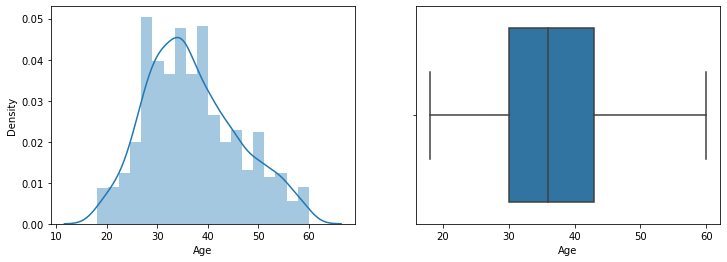

In [10]:
## Plot distribution and boxplot of Age variable
print(data["Age"].skew(), data["Age"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["Age"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["Age"])

-0.003518568352325854 -1.2038228076234574


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DailyRate'>

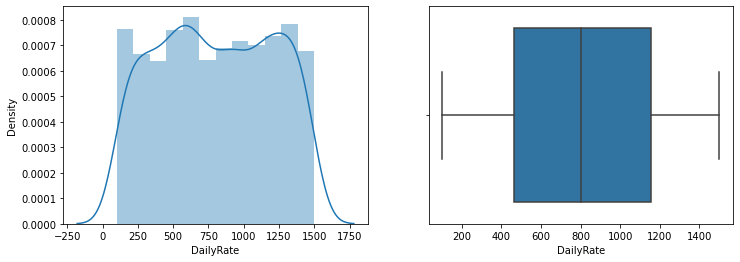

In [11]:
## Plot distribution and boxplot of DailyRate variable
print(data["DailyRate"].skew(), data["DailyRate"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["DailyRate"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["DailyRate"])

0.9581179956568269 -0.22483340490405102


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DistanceFromHome'>

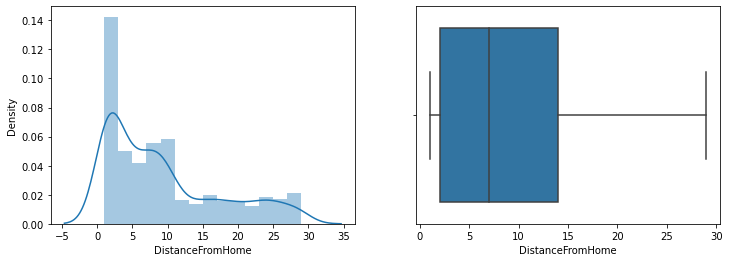

In [12]:
## Plot distribution and boxplot of DistanceFromHome variable
print(data["DistanceFromHome"].skew(), data["DistanceFromHome"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["DistanceFromHome"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["DistanceFromHome"])

-0.03231095290044942 -1.1963984562565886


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HourlyRate'>

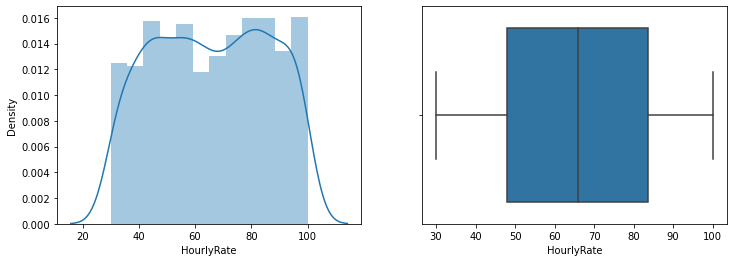

In [13]:
## Plot distribution and boxplot of HourlyRate variable
print(data["HourlyRate"].skew(), data["HourlyRate"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["HourlyRate"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["HourlyRate"])

1.3698166808390662 1.005232691449859


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

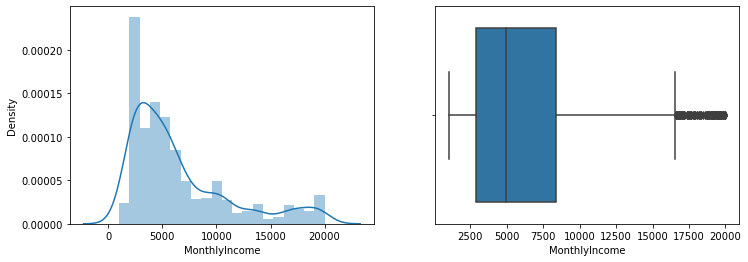

In [14]:
## Plot distribution and boxplot of MonthlyIncome variable
print(data["MonthlyIncome"].skew(), data["MonthlyIncome"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["MonthlyIncome"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["MonthlyIncome"])

In [15]:
## Log Transformation of MonthlyIncome variable 
MI = np.log(data["MonthlyIncome"])
MI

0       8.698347
1       8.542861
2       7.644919
3       7.975565
4       8.151333
          ...   
1465    7.852050
1466    9.209440
1467    8.722906
1468    8.592301
1469    8.390268
Name: MonthlyIncome, Length: 1470, dtype: float64

0.2861922926389174 -0.697525981797837


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

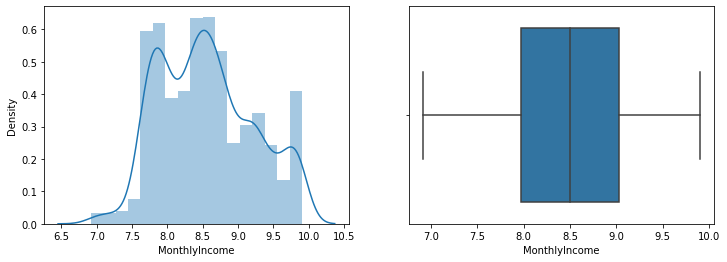

In [17]:
## Plot distribution and boxplot of MI variable
print(MI.skew(), MI.kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(MI, hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(MI)

In [18]:
## Replacing Monthly Variable data with log transformed data
data["MonthlyIncome"] = MI
data["MonthlyIncome"]

0       8.698347
1       8.542861
2       7.644919
3       7.975565
4       8.151333
          ...   
1465    7.852050
1466    9.209440
1467    8.722906
1468    8.592301
1469    8.390268
Name: MonthlyIncome, Length: 1470, dtype: float64

0.018577807891132458 -1.2149560995878737


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyRate'>

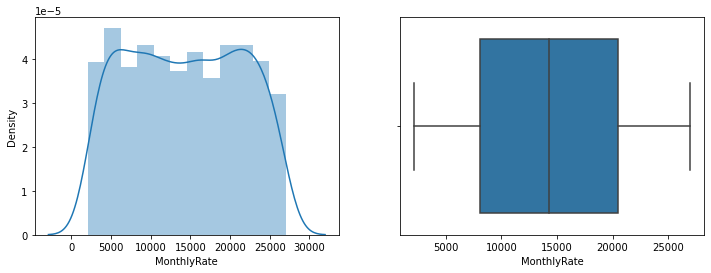

In [19]:
## Plot distribution and boxplot of Monthly variable
print(data["MonthlyRate"].skew(), data["MonthlyRate"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["MonthlyRate"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["MonthlyRate"])

1.1171718528128527 0.918269536621358


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkingYears'>

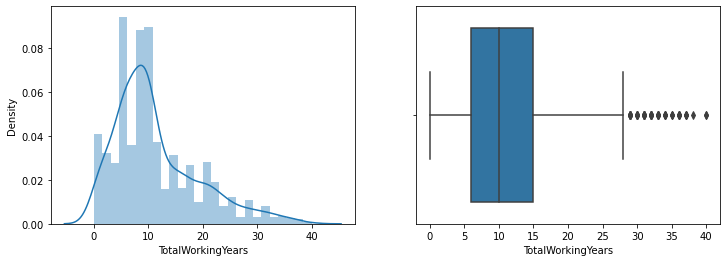

In [20]:
## Plot distribution and boxplot of TotalWorkingYears variable
print(data["TotalWorkingYears"].skew(), data["TotalWorkingYears"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["TotalWorkingYears"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["TotalWorkingYears"])

1.7645294543422085 3.93550875575465


C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\badboy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsAtCompany'>

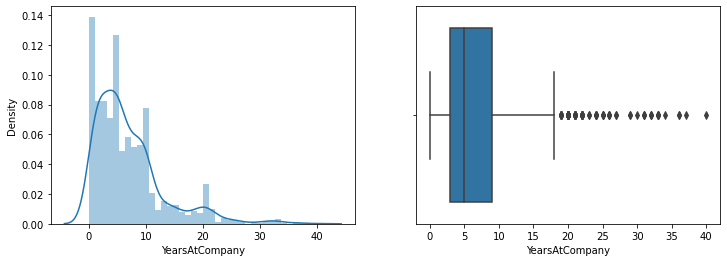

In [21]:
## Plot distribution and boxplot of YearsAtCompany variable
print(data["YearsAtCompany"].skew(), data["YearsAtCompany"].kurtosis())
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(data["YearsAtCompany"], hist=True, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data["YearsAtCompany"])

In [22]:
## Bring the target variable to last in the data frame
data["attrition"] = data["Attrition"]
data = data.drop("Attrition",axis=1)

In [23]:
## List the features to be encoded
features_tobe_encoded = ["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","OverTime"]

In [25]:
## Encode the categorical Features
data[features_tobe_encoded] = data[features_tobe_encoded].astype(str)
ordinal_encoder = OrdinalEncoder()
data[features_tobe_encoded] = ordinal_encoder.fit_transform(data[features_tobe_encoded])

In [26]:
## Encode the target variable
data["attrition"] = np.where(data["attrition"] == "Yes",1,0)
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,attrition
0,41,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,8.698347,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5,1
1,49,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,8.542861,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7,0
2,37,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,7.644919,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0,1
3,33,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,7.975565,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0,0
4,27,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,8.151333,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2,0


In [27]:
## Check the correlation among numerical features
data[["Age","DailyRate","HourlyRate","MonthlyIncome","MonthlyRate"]].corr()

,Age,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate
Age,1.000000,0.010661,0.024287,0.494310,0.028051
DailyRate,0.010661,1.000000,0.023381,0.012503,-0.032182
HourlyRate,0.024287,0.023381,1.000000,-0.017349,-0.015297
MonthlyIncome,0.494310,0.012503,-0.017349,1.000000,0.044495
MonthlyRate,0.028051,-0.032182,-0.015297,0.044495,1.000000


In [28]:
## List the relevant numerical features for modelling
num_features = ["Age","DailyRate","HourlyRate","MonthlyIncome","MonthlyRate"]

In [29]:
## List the categorical features except target variable
cate_features = [col for col in data.columns if (col not in num_features) and (col != "attrition")]
print(cate_features)
len(cate_features)

['BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


25

In [30]:
## Split the data for training and testing
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
validation_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=validation_size, random_state=seed)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1176, 30) (1176,) (294, 30) (294,)


In [31]:
## Seperate categorical features for training ang testing
X_train_cate = X_train[cate_features].values
y_train_cate = y_train.values
X_test_cate = X_test[cate_features].values
y_test_cate = y_test.values

In [33]:
# Function for conducting chi2 test of each categorical feature with target variable
def select_features(X_train_cate, X_test_cate, y_train_cate):
    fs = SelectKBest(score_func=chi2, k="all")
    fs.fit(X_train_cate, y_train_cate)
    X_train_fs = fs.transform(X_train_cate)
    X_test_fs = fs.transform(X_test_cate)
    return X_train_fs, X_test_fs, fs

In [34]:
X_train_fs, X_test_fs, fs = select_features(X_train_cate, X_test_cate, y_train_cate)

Feature 2: chi2 value: 59.490958 (p value: 0.000000)
Feature 8: chi2 value: 21.741574 (p value: 0.000003)
Feature 11: chi2 value: 12.937543 (p value: 0.000322)
Feature 13: chi2 value: 56.925515 (p value: 0.000000)
Feature 17: chi2 value: 17.312900 (p value: 0.000032)
Feature 18: chi2 value: 219.330815 (p value: 0.000000)
Feature 21: chi2 value: 145.789152 (p value: 0.000000)
Feature 22: chi2 value: 103.626564 (p value: 0.000000)
Feature 24: chi2 value: 120.493652 (p value: 0.000000)


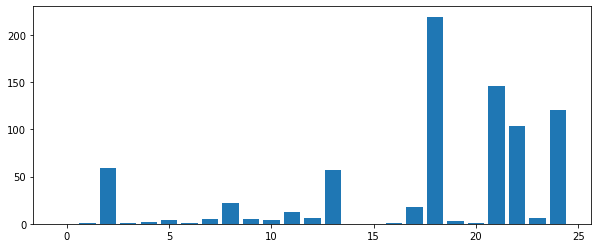

In [35]:
## Plot chi2 values with respect to their corresponding features
for i in range(len(fs.scores_)):
    if fs.pvalues_[i]<0.01:
        print('Feature %d: chi2 value: %f (p value: %f)' % (i, fs.scores_[i], fs.pvalues_[i]))
    
# plot the scores
plt.figure(figsize=(10,4))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [36]:
## Select the features with high chi2 values and p value less than 0.01
selected_cate = ['DistanceFromHome','JobLevel','MaritalStatus','OverTime','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']

In [37]:
## Group by "DistanceFromHome" and "Attrition"
Distance = dataset.groupby(["DistanceFromHome","Attrition"]).size().reset_index().rename(columns={0:"Count"})
Distance

,DistanceFromHome,Attrition,Count
0,1,No,182
1,1,Yes,26
2,2,No,183
3,2,Yes,28
4,3,No,70
5,3,Yes,14
6,4,No,55
7,4,Yes,9
8,5,No,55
9,5,Yes,10


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Count'>

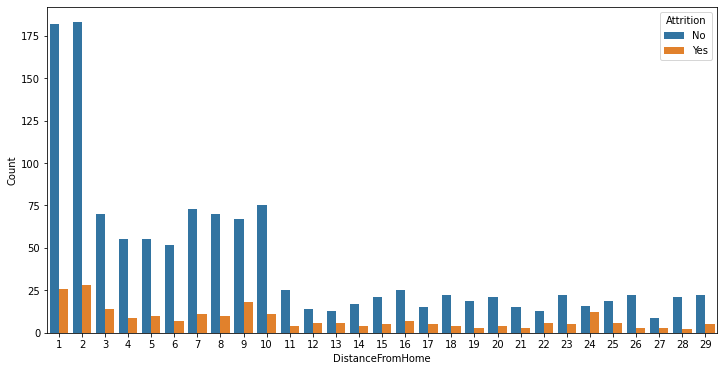

In [38]:
## Plot the barplot for "DistanceFromHome" for both attrition and no attrition
import matplotlib
matplotlib.rcParams["figure.figsize"]=(12,6)
sns.barplot(x="DistanceFromHome",y="Count",hue="Attrition",data=Distance)

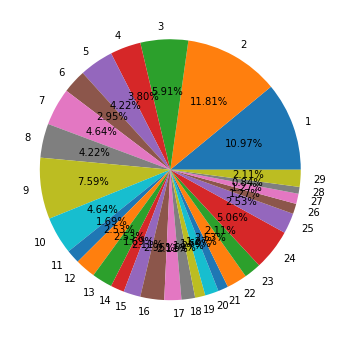

In [39]:
## Pie chart of DistanceFromHome for attritioned count
plt.pie(Distance[Distance.Attrition=="Yes"].Count, labels=Distance[Distance.Attrition=="Yes"].DistanceFromHome, autopct="%1.2f%%")
plt.show()

In [40]:
Job = dataset.groupby(['JobLevel',"Attrition"]).size().reset_index().rename(columns={0:"Count"})
Job

,JobLevel,Attrition,Count
0,1,No,400
1,1,Yes,143
2,2,No,482
3,2,Yes,52
4,3,No,186
5,3,Yes,32
6,4,No,101
7,4,Yes,5
8,5,No,64
9,5,Yes,5


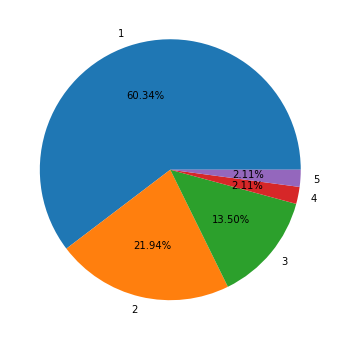

In [41]:
plt.pie(Job[Job.Attrition=="Yes"]["Count"], labels=Job[Job.Attrition=="Yes"]["JobLevel"], autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='JobLevel', ylabel='Count'>

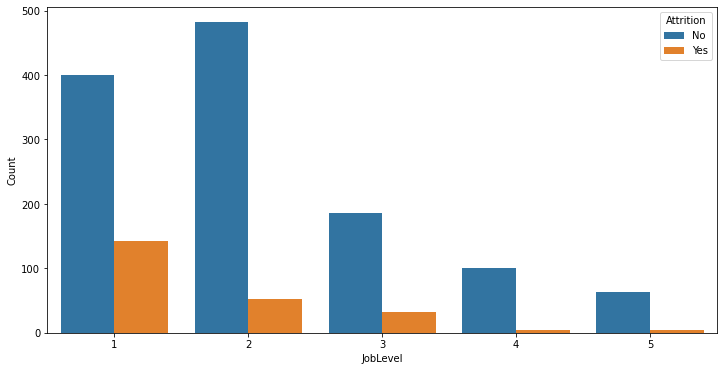

In [42]:
matplotlib.rcParams["figure.figsize"]=(12,6)
sns.barplot(x="JobLevel",y="Count",hue="Attrition",data=Job)

In [43]:
Marriage = dataset.groupby(["MaritalStatus","Attrition"]).size().reset_index().rename(columns={0:"Count"})
Marriage

,MaritalStatus,Attrition,Count
0,Divorced,No,294
1,Divorced,Yes,33
2,Married,No,589
3,Married,Yes,84
4,Single,No,350
5,Single,Yes,120


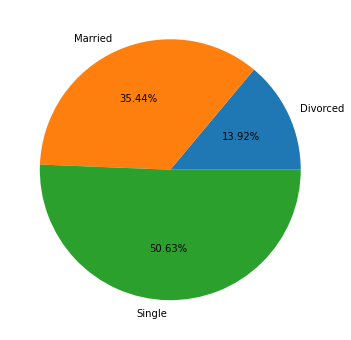

In [44]:
plt.pie(Marriage[Marriage.Attrition=="Yes"]["Count"], labels=Marriage[Marriage.Attrition=="Yes"]["MaritalStatus"], autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='MaritalStatus', ylabel='Count'>

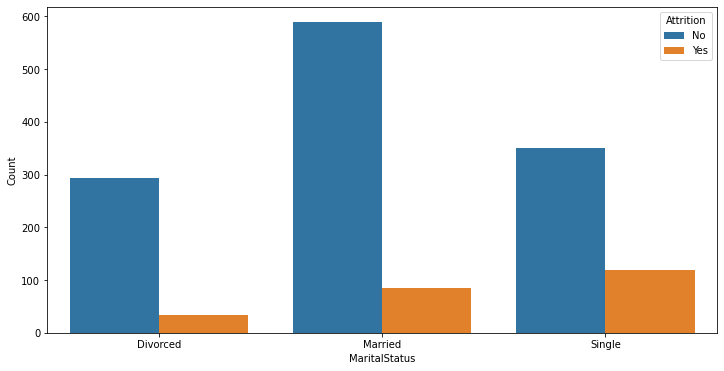

In [45]:
matplotlib.rcParams["figure.figsize"]=(12,6)
sns.barplot(x="MaritalStatus",y="Count",hue="Attrition",data=Marriage)

In [46]:
OT = dataset.groupby(["OverTime","Attrition"]).size().reset_index().rename(columns={0:"Count"})
OT

,OverTime,Attrition,Count
0,No,No,944
1,No,Yes,110
2,Yes,No,289
3,Yes,Yes,127


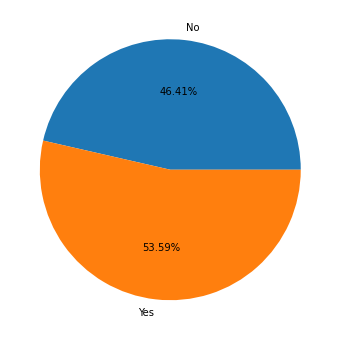

In [47]:
plt.pie(OT[OT.Attrition=="Yes"]["Count"], labels=OT[OT.Attrition=="Yes"]["OverTime"], autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='OverTime', ylabel='Count'>

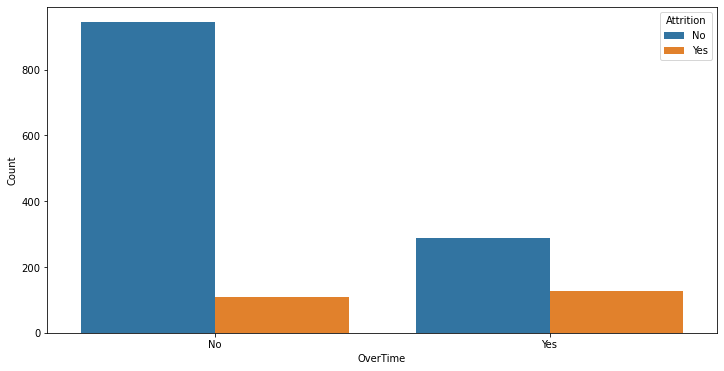

In [48]:
matplotlib.rcParams["figure.figsize"]=(12,6)
sns.barplot(x="OverTime",y="Count",hue="Attrition",data=OT)

In [49]:
SOP =  dataset.groupby(['StockOptionLevel',"Attrition"]).size().reset_index().rename(columns={0:"Count"})
SOP

,StockOptionLevel,Attrition,Count
0,0,No,477
1,0,Yes,154
2,1,No,540
3,1,Yes,56
4,2,No,146
5,2,Yes,12
6,3,No,70
7,3,Yes,15


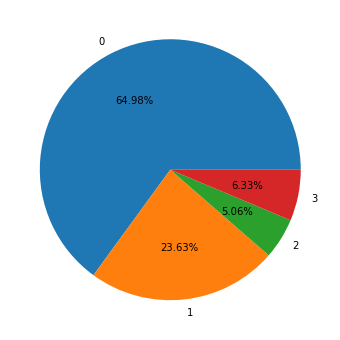

In [50]:
plt.pie(SOP[SOP.Attrition=="Yes"]["Count"], labels=SOP[SOP.Attrition=="Yes"]['StockOptionLevel'], autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Count'>

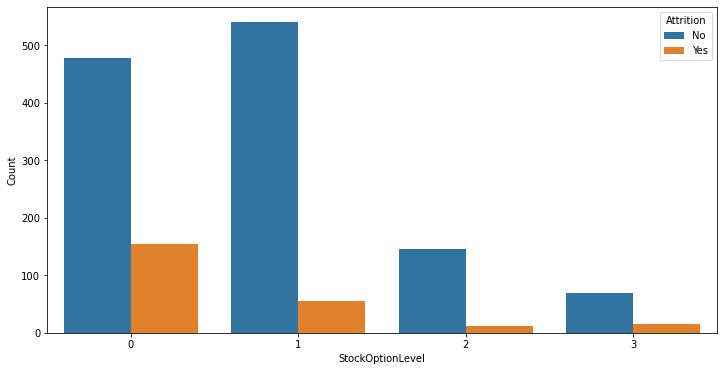

In [51]:
matplotlib.rcParams["figure.figsize"]=(12,6)
sns.barplot(x="StockOptionLevel",y="Count",hue="Attrition",data=SOP)

In [52]:
TWY =  dataset.groupby(['TotalWorkingYears',"Attrition"]).size().reset_index().rename(columns={0:"Count"})
TWY

,TotalWorkingYears,Attrition,Count
0,0,No,6
1,0,Yes,5
2,1,No,41
3,1,Yes,40
4,2,No,22
...,...,...,...
66,35,No,3
67,36,No,6
68,37,No,4
69,38,No,1


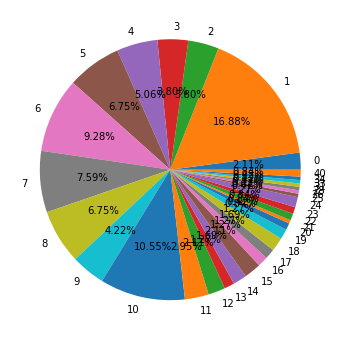

In [53]:
plt.pie(TWY[TWY.Attrition=="Yes"]["Count"], labels=TWY[TWY.Attrition=="Yes"]['TotalWorkingYears'], autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Count'>

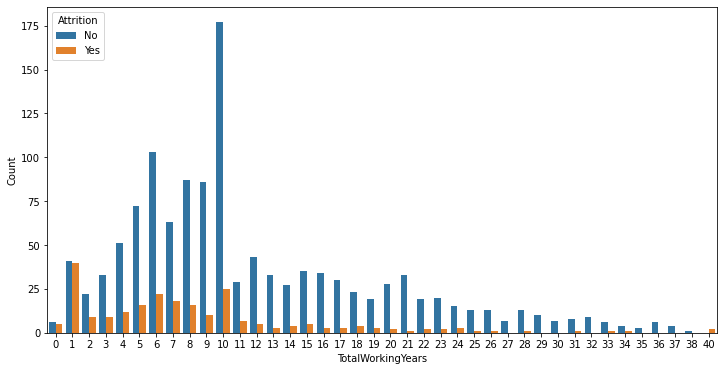

In [54]:
matplotlib.rcParams["figure.figsize"]=(12,6)
sns.barplot(x="TotalWorkingYears",y="Count",hue="Attrition",data=TWY)

In [55]:
YAC =  dataset.groupby(['YearsAtCompany',"Attrition"]).size().reset_index().rename(columns={0:"Count"})
YAC

,YearsAtCompany,Attrition,Count
0,0,No,28
1,0,Yes,16
2,1,No,112
3,1,Yes,59
4,2,No,100
...,...,...,...
59,33,Yes,1
60,34,No,1
61,36,No,2
62,37,No,1


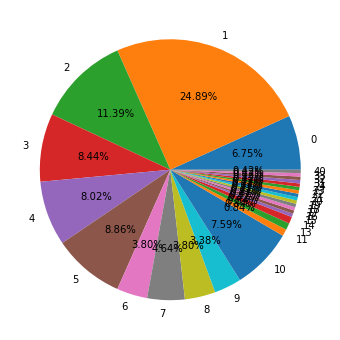

In [56]:
plt.pie(YAC[YAC.Attrition=="Yes"]["Count"], labels=YAC[YAC.Attrition=="Yes"]['YearsAtCompany'], autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

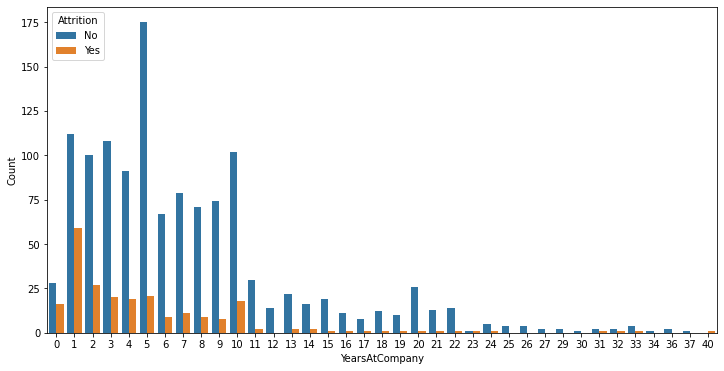

In [57]:
matplotlib.rcParams["figure.figsize"]=(12,6)
sns.barplot(x="YearsAtCompany",y="Count",hue="Attrition",data=YAC)

In [58]:
YCR =  dataset.groupby(['YearsInCurrentRole',"Attrition"]).size().reset_index().rename(columns={0:"Count"})
YCR

,YearsInCurrentRole,Attrition,Count
0,0,No,171
1,0,Yes,73
2,1,No,46
3,1,Yes,11
4,2,No,304
5,2,Yes,68
6,3,No,119
7,3,Yes,16
8,4,No,89
9,4,Yes,15


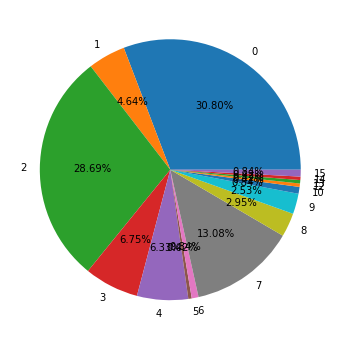

In [59]:
plt.pie(YCR[YCR.Attrition=="Yes"]["Count"], labels=YCR[YCR.Attrition=="Yes"]['YearsInCurrentRole'], autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Count'>

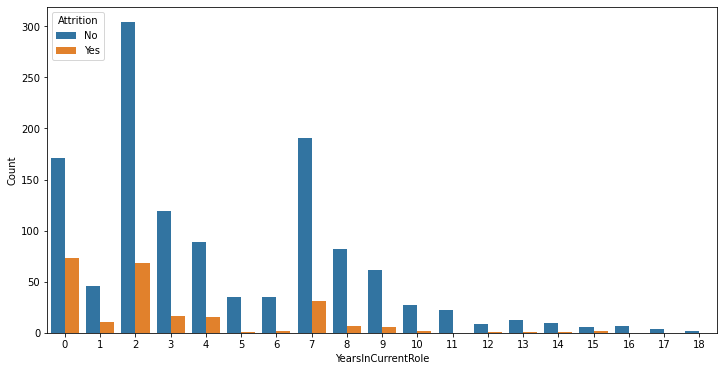

In [60]:
matplotlib.rcParams["figure.figsize"]=(12,6)
sns.barplot(x="YearsInCurrentRole",y="Count",hue="Attrition",data=YCR)

In [61]:
YCM =  dataset.groupby(['YearsWithCurrManager',"Attrition"]).size().reset_index().rename(columns={0:"Count"})
YCM

,YearsWithCurrManager,Attrition,Count
0,0,No,178
1,0,Yes,85
2,1,No,65
3,1,Yes,11
4,2,No,294
5,2,Yes,50
6,3,No,123
7,3,Yes,19
8,4,No,87
9,4,Yes,11


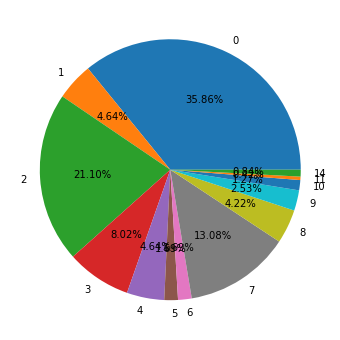

In [62]:
plt.pie(YCM[YCM.Attrition=="Yes"]["Count"], labels=YCM[YCM.Attrition=="Yes"]['YearsWithCurrManager'], autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Count'>

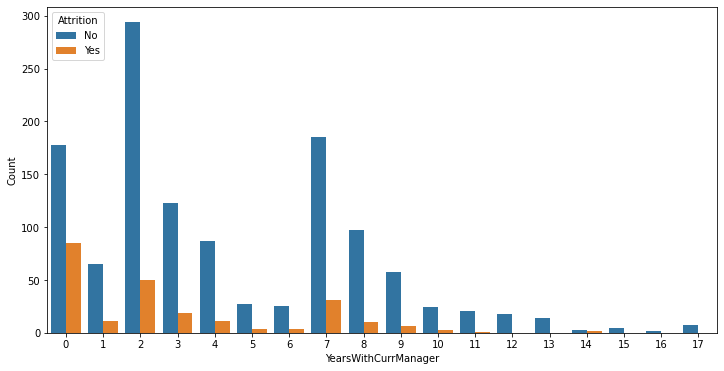

In [63]:
matplotlib.rcParams["figure.figsize"]=(12,6)
sns.barplot(x="YearsWithCurrManager",y="Count",hue="Attrition",data=YCM)

In [76]:
age = dataset[dataset.Attrition=="Yes"].groupby(["Age"]).size().reset_index().rename(columns={0:"Count"})
age

,Age,Count
0,18,4
1,19,6
2,20,6
3,21,6
4,22,5
5,23,4
6,24,7
7,25,6
8,26,12
9,27,3


In [79]:
dataset[num_features].nunique()

Age                43
DailyRate         886
HourlyRate         71
MonthlyIncome    1349
MonthlyRate      1427
dtype: int64

In [88]:
HR = dataset[dataset.Attrition=="Yes"].groupby(["HourlyRate"]).size().reset_index().rename(columns={0:"Count"})
print(HR.Count.unique())
HR[HR.Count==7]

[2 4 3 5 1 6 7]


,HourlyRate,Count
34,66,7


In [64]:
## concatenate the categorical features data and numerical features data for train and test sets seperately.
final_df_train= pd.concat([X_train[num_features], X_train[selected_cate], y_train], axis=1)
final_df_test = pd.concat([X_test[num_features], X_test[selected_cate], y_test], axis=1)
X_train = final_df_train.values[:,:-1]
y_train = final_df_train.values[:,-1]
X_test = final_df_test.values[:,:-1]
y_test = final_df_test.values[:,-1]
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1176, 14) (294, 14) (1176,) (294,)


In [66]:
## Evaluate the models
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.851159 (0.027435)
ScaledLDA: 0.845219 (0.024129)
ScaledKNN: 0.832486 (0.026094)
ScaledCART: 0.769578 (0.023917)
ScaledNB: 0.768847 (0.037765)
ScaledSVM: 0.849450 (0.030477)


In [67]:
## Validation of LogisticRegression Model on test dataset
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LogisticRegression()
model.fit(rescaledX, y_train)
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_test, predictions))

0.8639455782312925
